<a href="https://colab.research.google.com/github/MadeaRiggs/AIPlanet-Deep-Learning-projects/blob/main/AIPlanet_hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


# Agenda
1. About the Dataset
2. Objective
3. Loading Libraries
4. Loading Data
5. View Data
6. Separate Input Features and Output Features/Variables
7. Split The Data into Train and Test Set
8. Train the model (The five step model life cycle)
  1. Define the model.
  2. Compile the model.
  3. Fit the model.
  4. Evaluate the model
    * Hyperparameter Tunning
  5. Prediction

## About the Dataset
We will be working on a data set that comes from the real estate industry in Boston (US). This database contains 14 attributes. The output variable refers to the median value of owner-occupied homes in 1000 USD's.

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per 10,000 USD
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: lower status of the population (%)
* MEDV: Median value of owner-occupied homes in 1000 USD's (Output/Target)


## Objective
The objective is to use linear regression to find the median value of owner-occupied homes in 1000 USD's.

We will build a Machine learning model (i.e. Linear Regression) using `tensorflow.keras` (in short `tf.keras`) API.

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#load data
boston_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Training_set_boston.csv" )

In [ ]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2


#Separating Input Features and Output Features
Before building any machine learning model, we always separate the input variables and output variables.

**Input Variables or Independent Variables** are those quantities whose values are changed naturally in an experiment

**Output Variable or Dependent Variable** is the one whose values are dependent on the input variables.

Like here in this data, we are trying to predict the price of a houce i.e. 'MEDV', so this is our Output Variable

By convention input variables are represented with 'X' and output variables are represented with 'y'.

In [ ]:
# Input Variables/features
X = boston_data.drop('MEDV', axis = 1) 

# output variables/features
y = boston_data.MEDV      

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_test: independent/input feature data for testing the model; will be used to predict the output values
# y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.
 
# test_size = 0.20: 20% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

In [ ]:
# find the number of input features/columns
n_features = X.shape[1]
print(n_features)

13


## The 5 Step Model Life-Cycle

A model has a life-cycle, and this very simple knowledge provides the backbone for both modeling a dataset and understanding the tf.keras API.

The five steps in the life-cycle are as follows:

1. Define the model.
2. Compile the model.
3. Fit the model.
4. Make predictions on the test data.
5. Evaluate the model.

## Stage 1: Define model

In [ ]:
#Stage 1
import tensorflow
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense  # import Dense from tensorflow.keras.layers
from numpy.random import seed     # seed helps you to fix the randomness in the neural network. 

Note that the visible layer of the network is defined by the “input_shape” argument on the first hidden layer. 

The sequential API is easy to use because you keep calling model.add() until you have added all of your layers.

The activation function we have chosen is **ReLU**, which stands for **rectified linear unit**. Activation function decides, whether a neuron should be activated or not

ReLU is an activation function which is defined mathematically as **F(x) = max(0,x)**. In other words, the output is x, if x is greater than 0, and the output is 0 if x is 0 or negative.

In [ ]:
#defining the model using Sequential API
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [ ]:
#the number of parameters will depend on the input being given
#Usually we add 1 to the initial parameters. The total number will be num_inputs + 1 (for bias)
model.summary() # Ths shows how many layers are in the network which in this case it is 3

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                140       
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


## Stage 2: Compile model

In [ ]:
# import RMSprop optimizer
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.01)    # 0.01 is the learning rate

In [ ]:
#compile the model
model.compile(loss='mean_squared_error',optimizer=optimizer)  #optimizer optimizes the cost function we are trying to  

## Stage 3: Fitting the model

In [ ]:
# If you build the model with given parameters, set_random_seed will help you produce the same result on multiple execution in different environment and computers
seed_value = 42
seed(seed_value)        

# Recommended by Keras -------------------------------------------------------------------------------------
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# Recommended by Keras -------------------------------------------------------------------------------------


# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tensorflow.random.set_seed(seed_value) 

# fit the model
model.fit(X_train, y_train, epochs=10, batch_size=30, verbose = 1)   

Epoch 1/10
11/11 [==============================] - 1s 2ms/step - loss: 3424.8242
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 175.0317
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 166.0611
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 174.9950
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 101.8014
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 192.2434
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 116.4220
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 128.7858
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 127.7807
Epoch 10/10
11/11 [==============================] - 0s 3ms/step - loss: 115.8690


## Stage 4: Evaluate the model

In [ ]:
#evaluate() does this task automatically. If you want to get the prediciton for X_test you can do model.predict(X_test)
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 59.6878


59.687782287597656

In [ ]:
#model.predict(X_test)

Defining plot function that plots the values of the loss function with respect to the number of epochs that it takes throughout the dataset. It is expected that after each epoch, the loss should decrease and move towards its minimum value. 

In [ ]:
def loss_curve (epochs, rmse) :
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.show()


#### Hyperparameter Tunning
The hyperparameters here in this notebook are:
1. Learning Rate
2. Epochs
3. Batch Size

We can try and change the values of these parameters and see the performance  of the model (evaluate the model) on X_test data

**1. Learning Rate**

A scalar used to train a model via gradient descent. During each iteration, the **gradient descent** algorithm multiplies the learning rate by the gradient. The resulting product is called the **gradient step**.

Learning rate is a key **hyperparameter**.

In [ ]:
####################### Complete example to check the performance of the model with different learning rates #######################################
# define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

optimizer = RMSprop(0.1)    # 0.1 is the learning rate

# compile the model
model.compile(loss='mean_squared_error',optimizer=optimizer)    

# fit the model 
history= model.fit(X_train, y_train, epochs=10, batch_size=30, verbose = 1)

# evaluate the model
print('The MSE value is: ', model.evaluate(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 1s 2ms/step - loss: 9724.5732
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 582.0069
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 555.8216
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 521.9397
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 483.8689
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 444.7491
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 406.9054
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 371.2612
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 337.6587
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 271.3605
The MSE value is:  271.36053466796875


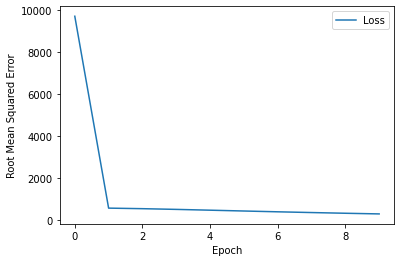

In [ ]:
loss_curve(history.epoch, history.history['loss'])

Experimenting with different hyperparameters

In [ ]:
# Play with learning rate
learning_rate = 0.01         # Replace ? with a floating-point number(decimal no.)
epochs = 20
optimizer = RMSprop(learning_rate)

# Compile the model
model.compile(loss='mean_squared_error',optimizer=optimizer)
# Fit the model   
history= model.fit(X_train, y_train, epochs=epochs, batch_size=30)
# Evaluate the model       
model.evaluate(X_test, y_test)                                  

Epoch 1/20
11/11 [==============================] - 1s 2ms/step - loss: 90.8898
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 90.8540
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 90.8485
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 90.8579
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 90.8422
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 90.8477
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 90.8532
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 90.8501
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 90.8486
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 90.8441
Epoch 11/20
11/11 [==============================] - 0s 2ms/step - loss: 90.8443
Epoch 12/20
11/11 [==============================] - 0s 3ms/step - loss: 90.8433
Epoch 13/20
11/11 [==================

71.10740661621094

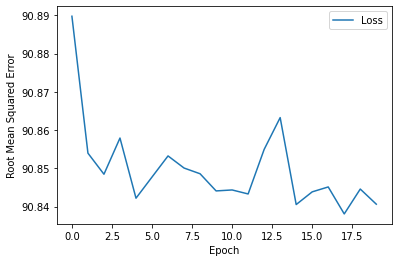

In [ ]:
loss_curve(history.epoch, history.history['loss'])

**2. Epochs**

A full training pass over the entire dataset such that each example has been seen once. Thus, an epoch represents N/batch size training iterations, where N is the total number of examples.

In [ ]:
####################### Complete example to check the performance of the model with different epochs and learning rate = 0.01 #######################################
# define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

optimizer = RMSprop(0.01)    # 0.01 is the learning rate
model.compile(loss='mean_squared_error',optimizer=optimizer)    # Compile the model

# fit the model 
history= model.fit(X_train, y_train, epochs=100, batch_size=30, verbose = 1)

# evaluate the model
print('The MSE value is: ', model.evaluate(X_test, y_test))

Epoch 1/100
11/11 [==============================] - 2s 6ms/step - loss: 161.8351
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 100.0030
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 94.0145
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 96.2322
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 82.7633
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 85.2960
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 77.2067
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 79.4949
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 72.0021
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 82.1729
Epoch 11/100
11/11 [==============================] - 0s 4ms/step - loss: 76.3034
Epoch 12/100
11/11 [==============================] - 0s 3ms/step - loss: 78.0465
Epoch 13/100
11/11 [===

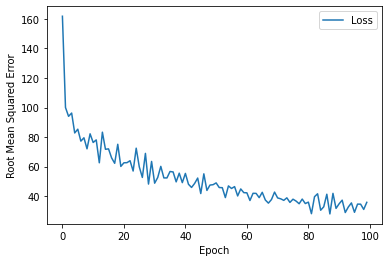

In [ ]:
loss_curve(history.epoch, history.history['loss'])

In [ ]:
# Play with epochs
learning_rate = 0.01         
epochs = 150            # Replace ? with an integer
optimizer = RMSprop(learning_rate)

# Compile the model
model.compile(loss='mean_squared_error',optimizer=optimizer)

# Fit the model    
made= model.fit(X_train, y_train, epochs=epochs, batch_size=30)

# Evaluate the model       
model.evaluate(X_test, y_test)                                 

Epoch 1/150
11/11 [==============================] - 1s 2ms/step - loss: 49.8512
Epoch 2/150
11/11 [==============================] - 0s 2ms/step - loss: 34.6838
Epoch 3/150
11/11 [==============================] - 0s 2ms/step - loss: 33.4178
Epoch 4/150
11/11 [==============================] - 0s 2ms/step - loss: 32.7962
Epoch 5/150
11/11 [==============================] - 0s 2ms/step - loss: 25.6983
Epoch 6/150
11/11 [==============================] - 0s 2ms/step - loss: 32.3421
Epoch 7/150
11/11 [==============================] - 0s 2ms/step - loss: 28.4828
Epoch 8/150
11/11 [==============================] - 0s 2ms/step - loss: 27.3685
Epoch 9/150
11/11 [==============================] - 0s 2ms/step - loss: 29.6202
Epoch 10/150
11/11 [==============================] - 0s 2ms/step - loss: 28.2392
Epoch 11/150
11/11 [==============================] - 0s 2ms/step - loss: 31.3120
Epoch 12/150
11/11 [==============================] - 0s 2ms/step - loss: 34.8738
Epoch 13/150
11/11 [=====

20.191438674926758

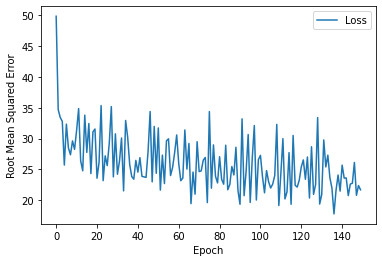

In [ ]:
loss_curve(made.epoch, made.history['loss'])

In [ ]:
# play with learning rate and epochs
learning_rate = 0.04        # Replace ? with a floating-point number
epochs = 200            # Replace ? with an integer
optimizer = RMSprop(learning_rate)
model.compile(loss='mean_squared_error',optimizer=optimizer)    # Compile the model
model.fit(X_train, y_train, epochs=epochs, batch_size=30)       # Fit the model
model.evaluate(X_test, y_test)                                  # Evaluate the model

Epoch 1/200
11/11 [==============================] - 1s 2ms/step - loss: 141.5827
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 82.6857
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 109.2159
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 74.8626
Epoch 5/200
11/11 [==============================] - 0s 3ms/step - loss: 74.7834
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 73.2370
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 62.0344
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 75.0673
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 128.2327
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 53.6820
Epoch 11/200
11/11 [==============================] - 0s 2ms/step - loss: 52.9867
Epoch 12/200
11/11 [==============================] - 0s 2ms/step - loss: 78.5163
Epoch 13/200
11/11 [==

73.1686782836914

Epoch 1/200
11/11 [==============================] - 1s 2ms/step - loss: 92.6264
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 91.6359
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 91.5465
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 92.2480
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 90.9525
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 91.7743
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 91.6962
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 91.5194
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 91.8208
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 91.4569
Epoch 11/200
11/11 [==============================] - 0s 3ms/step - loss: 91.3142
Epoch 12/200
11/11 [==============================] - 0s 3ms/step - loss: 91.2042
Epoch 13/200
11/11 [=====

72.7640380859375

**3. Batch Size**

The number of examples in a batch.

In [ ]:
####################### Complete example to check the performance of the model with different batch size while keeping epochs as 30 and learning rate as 0.01 #######################################
# define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

optimizer = RMSprop(0.01)    # 0.01 is the learning rate
model.compile(loss='mean_squared_error',optimizer=optimizer)    # Compile the model

# fit the model 
model.fit(X_train, y_train, epochs=10, batch_size=40, verbose = 1)

# evaluate the model
print('The MSE value is: ', model.evaluate(X_test, y_test))

Epoch 1/10
9/9 [==============================] - 1s 5ms/step - loss: 967.5180
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 606.2019
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 599.1036
Epoch 4/10
9/9 [==============================] - 0s 3ms/step - loss: 594.1597
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 590.1794
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 586.1730
Epoch 7/10
9/9 [==============================] - 0s 3ms/step - loss: 582.0836
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 578.1439
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 574.3418
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 550.8616
The MSE value is:  550.8616333007812


In [ ]:
# play with batch size
learning_rate = 0.01        
epochs = 150         
batch = 10     # Replace ? with an integer    
optimizer = RMSprop(learning_rate)
model.compile(loss='mean_squared_error',optimizer=optimizer)    # compile the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch)     # fit the model
model.evaluate(X_test, y_test)       # Evaluate the model

Epoch 1/150
33/33 [==============================] - 1s 2ms/step - loss: 119.7471
Epoch 2/150
33/33 [==============================] - 0s 2ms/step - loss: 116.7746
Epoch 3/150
33/33 [==============================] - 0s 2ms/step - loss: 114.0615
Epoch 4/150
33/33 [==============================] - 0s 2ms/step - loss: 111.6452
Epoch 5/150
33/33 [==============================] - 0s 2ms/step - loss: 109.2559
Epoch 6/150
33/33 [==============================] - 0s 2ms/step - loss: 106.9031
Epoch 7/150
33/33 [==============================] - 0s 2ms/step - loss: 104.9495
Epoch 8/150
33/33 [==============================] - 0s 2ms/step - loss: 103.3099
Epoch 9/150
33/33 [==============================] - 0s 2ms/step - loss: 101.7180
Epoch 10/150
33/33 [==============================] - 0s 2ms/step - loss: 100.1694
Epoch 11/150
33/33 [==============================] - 0s 2ms/step - loss: 98.9345
Epoch 12/150
33/33 [==============================] - 0s 3ms/step - loss: 97.7753
Epoch 13/150
33

71.08043670654297

#### **Summary of hyperparameter tuning**
Most machine learning problems require a lot of hyperparameter tuning. Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly. You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

*  Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
*  If the training loss does not converge, train for more epochs.
*  If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
*  If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
*  Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
*  Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
*  For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.

#### 5. Make a Prediction
Making a prediction is the final step in the life-cycle. It is why we wanted the model in the first place.

It requires you have new data for which a prediction is required, e.g. where you do not have the output values.

From an API perspective, you simply call a function to make a prediction of a class label, probability, or numerical value: whatever you designed your model to predict.

In [ ]:
# Load new test data
new_test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Testing_set_boston.csv')

In [ ]:
model.predict(new_test_data)

4/4 [==============================] - 0s 3ms/step


array([[22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],
       [22.733955],


We can do a hyperparameter tuning procedure in two ways:
1. Implementing hyperparameter tuning with Sklearn
2. Implementing hyperparameter tuning with Keras

#### **Implementing hyperparameter tuning with Sklearn**
Well, we can automate the hyperparameter tunning using **GridSearCV**. GridSearchCV is a hyperparameter search procedure that is done over a defined grid of hyperparameters. Each one of the hyperparameter combinations is used for training a new model, while a cross-validation process is executed to measure the performance of the provisional models. Once the process is done, the hyperparameters and the model with the best performance are chosen.

Let's first take a look at the implementation of GridSearchCV with Sklearn, following the steps:
1. Define the general architecture of the model
2. Define the hyperparameters grid to be validated
3. Run the GridSearchCV process
4. Print the results of the best model

In [ ]:
# Import the GridSearchCV class
from sklearn.model_selection import GridSearchCV

# 1. Define the model's architecture
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
optimizer = RMSprop(0.1)    # 0.1 is the learning rate
model.compile(loss='mean_squared_error',optimizer=optimizer)    # compile the model

# 2. Define the hyperparameters grid to be validated
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1)

# 3. Run the GridSearchCV process
grid_result = grid.fit(X_train, y_train)

# 4. Print the results of the best model
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

TypeError: ignored

We can observe an error in the hyperparameter tuning procedure using native Sklearn, because the defined model is a Sequential model implemented by Keras, not a scikit-learn estimator. In order to correct this error, we will integrate Sklearn and Keras properly, by (a) creating a `create_model` function that allows to create the model in an automated way, and (b) defining a `KerasRegressor` model which is an implementation of the scikit-learn regressor API for Keras

In [ ]:
# ----------------------------- Functional Tuning - Option 1: using Sklearn  ------------------------------
# Goal: tune the batch size and epochs

# Import KerasRegressor class
from keras.wrappers.scikit_learn import KerasRegressor

# Define the model trhough a user-defined function
def create_model(optimizer=RMSprop(0.01)):
  model = Sequential()
  model.add(Dense(10, activation='relu', input_shape=(n_features,)))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mse', metrics=['mse'], optimizer=optimizer)    # compile the model
  return model
model = KerasRegressor(build_fn=create_model, verbose=1)

# Define the hyperparameters grid to be validated
batch_size = [10, 20, 30, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, nb_epoch=epochs)
model = KerasRegressor(build_fn=create_model, verbose=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Run the GridSearchCV process
grid_result = grid.fit(X_train, y_train, verbose = 1)

# Print the results of the best model
print('Best params: ' + str(grid_result.best_params_))

33/33 [==============================] - 0s 1ms/step - loss: 500.3896 - mse: 500.3896
Best params: {'batch_size': 10, 'nb_epoch': 10}


In [ ]:
# Import the cross validation evaluator
from sklearn.model_selection import cross_val_score

# Measure the model's performance
results = cross_val_score(grid.best_estimator_, X_test, y_test, cv=5)
print('Results: \n  * Mean:', -results.mean(), '\n  * Std:', results.std())

2/2 [==============================] - 0s 4ms/step - loss: 139.6336 - mse: 139.6336
Results: 
  * Mean: 445.06143951416016 
  * Std: 531.0475750207843


#### **Implementing hyperparameter tuning with Keras**
Now we will go through the process of automating hyperparameter tuning using **Random Search** and **Keras**. Random Search is a hyperparameter search procedure that is performed on a defined grid of hyperparameters. However, not all hyperparameter combinations are used to train a new model, only some selected randomly, while a process of cross-validation to measure the performance of temporal models. Once the process is complete, the hyperparameters and the best performing model are chosen.

Let's take a look at the implementation of Random Search with Keras, following the steps:

0. Install and import all the packages needed
1. Define the general architecture of the model through a creation function
2. Define the hyperparameters grid to be validated
3. Run the GridSearchCV process
4. Print the results of the best model

To execute the hyperparameter tuning procedure we will use the `keras-tuner`, a library that helps you pick the optimal set of hyperparameters for your TensorFlow model.

In [ ]:
# ----------------------------- Functional Tuning - Option 2: using Keras Tuner ------------------------------
# Goal: tune the learning rate

# 0. Install and import all the packages needed
!pip install -q -U keras-tuner
import kerastuner as kt

# 1. Define the general architecture of the model through a creation user-defined function
def model_builder(hp):
  model = Sequential()
  model.add(Dense(10, activation='relu', input_shape=(n_features,)))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1))
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 1e-4]) # Tuning the learning rate (four different values to test: 0.1, 0.01, 0.001, 0.0001)
  optimizer = RMSprop(learning_rate = hp_learning_rate)                            # Defining the optimizer
  model.compile(loss='mse',metrics=['mse'], optimizer=optimizer)                   # Compiling the model 
  return model                                                                     # Returning the defined model

# 2. Define the hyperparameters grid to be validated
tuner_rs = kt.RandomSearch(
              model_builder,                # Takes hyperparameters (hp) and returns a Model instance
              objective = 'mse',            # Name of model metric to minimize or maximize
              seed = 42,                    # Random seed for replication purposes
              max_trials = 5,               # Total number of trials (model configurations) to test at most. Note that the oracle may interrupt the search before max_trial models have been tested.
              directory='random_search')    # Path to the working directory (relative).

# 3. Run the GridSearchCV process
tuner_rs.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
9/9 [==============================] - 0s 20ms/step - loss: 5115.7114 - mse: 5115.7114 - val_loss: 527.6143 - val_mse: 527.6143
Epoch 2/10
9/9 [==============================] - 0s 6ms/step - loss: 631.4748 - mse: 631.4748 - val_loss: 486.6498 - val_mse: 486.6498
Epoch 3/10
9/9 [==============================] - 0s 5ms/step - loss: 591.8683 - mse: 591.8683 - val_loss: 451.8018 - val_mse: 451.8018
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 553.3091 - mse: 553.3091 - val_loss: 405.2310 - val_mse: 405.2310
Epoch 5/10
9/9 [==============================] - 0s 5ms/step - loss: 415.7266 - mse: 415.7266 - val_loss: 137.3820 - val_mse: 137.3820
Epoch 6/10
9/9 [==============================] - 0s 5ms/step - loss: 181.2757 - mse: 181.2757 - val_loss: 349.1423 - val_mse: 349.1423
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 241.5480 - mse: 241.5480 - val_loss: 628.4697 - val_mse: 628.4697
Epoch 8/10
9/9 [=============================

Epoch 1/10
9/9 [==============================] - 0s 18ms/step - loss: 2369.5652 - mse: 2369.5652 - val_loss: 2086.2415 - val_mse: 2086.2415
Epoch 2/10
9/9 [==============================] - 0s 5ms/step - loss: 2319.8223 - mse: 2319.8223 - val_loss: 2047.9214 - val_mse: 2047.9214
Epoch 3/10
9/9 [==============================] - 0s 5ms/step - loss: 2281.5579 - mse: 2281.5579 - val_loss: 2013.5859 - val_mse: 2013.5859
Epoch 4/10
9/9 [==============================] - 0s 5ms/step - loss: 2246.2014 - mse: 2246.2014 - val_loss: 1980.2305 - val_mse: 1980.2305
Epoch 5/10
9/9 [==============================] - 0s 5ms/step - loss: 2211.8816 - mse: 2211.8816 - val_loss: 1951.4897 - val_mse: 1951.4897
Epoch 6/10
9/9 [==============================] - 0s 5ms/step - loss: 2181.1345 - mse: 2181.1345 - val_loss: 1919.9293 - val_mse: 1919.9293
Epoch 7/10
9/9 [==============================] - 0s 5ms/step - loss: 2148.5950 - mse: 2148.5950 - val_loss: 1888.0750 - val_mse: 1888.0750
Epoch 8/10
9/9 [===

Epoch 1/10
9/9 [==============================] - 0s 21ms/step - loss: 167.4187 - mse: 167.4187 - val_loss: 111.0479 - val_mse: 111.0479
Epoch 2/10
9/9 [==============================] - 0s 5ms/step - loss: 152.3961 - mse: 152.3961 - val_loss: 99.7410 - val_mse: 99.7410
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 144.1482 - mse: 144.1482 - val_loss: 91.9177 - val_mse: 91.9177
Epoch 4/10
9/9 [==============================] - 0s 5ms/step - loss: 137.6506 - mse: 137.6506 - val_loss: 85.9139 - val_mse: 85.9139
Epoch 5/10
9/9 [==============================] - 0s 5ms/step - loss: 133.1032 - mse: 133.1032 - val_loss: 81.7799 - val_mse: 81.7799
Epoch 6/10
9/9 [==============================] - 0s 5ms/step - loss: 128.7415 - mse: 128.7415 - val_loss: 78.0218 - val_mse: 78.0218
Epoch 7/10
9/9 [==============================] - 0s 5ms/step - loss: 124.9512 - mse: 124.9512 - val_loss: 74.4188 - val_mse: 74.4188
Epoch 8/10
9/9 [==============================] - 0s 5ms/st

Epoch 1/10
9/9 [==============================] - 0s 19ms/step - loss: 344.1214 - mse: 344.1214 - val_loss: 285.5694 - val_mse: 285.5694
Epoch 2/10
9/9 [==============================] - 0s 5ms/step - loss: 159.7777 - mse: 159.7777 - val_loss: 238.0298 - val_mse: 238.0298
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 165.3195 - mse: 165.3195 - val_loss: 193.2417 - val_mse: 193.2417
Epoch 4/10
9/9 [==============================] - 0s 5ms/step - loss: 141.4814 - mse: 141.4814 - val_loss: 584.3061 - val_mse: 584.3061
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 141.6709 - mse: 141.6709 - val_loss: 136.0439 - val_mse: 136.0439
Epoch 6/10
9/9 [==============================] - 0s 5ms/step - loss: 135.3921 - mse: 135.3921 - val_loss: 522.0715 - val_mse: 522.0715
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 150.2538 - mse: 150.2538 - val_loss: 673.9136 - val_mse: 673.9136
Epoch 8/10
9/9 [==============================]

INFO:tensorflow:Oracle triggered exit


In [ ]:
# 4.1. Print the summary results of the hyperparameter tuning procedure
tuner_rs.results_summary()

In [ ]:
# 4.2. Print the results of the best model
best_model = tuner_rs.get_best_models(num_models=1)[0]
best_model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 48.6127 - mse: 48.6127


[48.612728118896484, 48.612728118896484]

In [ ]:
# 4.3. Print the best model's architecture
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Load new test data
new_test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Testing_set_boston.csv')

In [ ]:
# make a prediction
model.predict(new_test_data)